# Object Recognition

## Import some libraries


In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Loading the data

In [37]:
from tensorflow.keras.datasets.cifar10 import load_data
(X_train, y_train), (X_test, y_test)= load_data()
# test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")

In [38]:
# Set seed
from numpy.random import seed
seed(1)

In [39]:
help(load_data)

Help on function load_data in module keras.src.datasets.cifar10:

load_data()
    Loads the CIFAR10 dataset.
    
    This is a dataset of 50,000 32x32 color training images and 10,000 test
    images, labeled over 10 categories. See more info at the
    [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    The classes are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | airplane    |
    |   1   | automobile  |
    |   2   | bird        |
    |   3   | cat         |
    |   4   | deer        |
    |   5   | dog         |
    |   6   | frog        |
    |   7   | horse       |
    |   8   | ship        |
    |   9   | truck       |
    
    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(50000, 32, 32, 3)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **`y_train`**: `uint8` NumPy array of l

In [40]:
X_train[0].shape

(32, 32, 3)

In [41]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

## Normalize the data

In [42]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Label class

In [43]:
class_names = [
    "airplane",
    "autmobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "Truck",
    
]

In [44]:
print("The lenth of X_train set is:", len(X_train))
print("The lenth of y_train set is:", len(y_train))
print("The lenth of X_test set is:", len(X_test))
print("The lenth of y_test set is:", len(y_test))

The lenth of X_train set is: 50000
The lenth of y_train set is: 50000
The lenth of X_test set is: 10000
The lenth of y_test set is: 10000


In [45]:
print(X_train[67].shape)

(32, 32, 3)


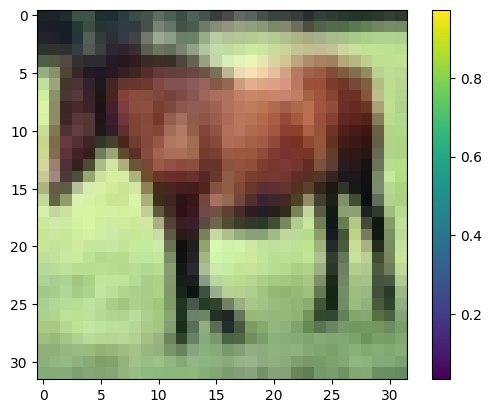

In [47]:
plt.figure()
plt.imshow(X_train[7])
plt.colorbar()
plt.grid( False)
plt.show()

In [54]:
import random
def showRandomfigures(rows, columns, images, labels, figSize=(15,15)):
    try:
        if (rows>0 and columns>0 and len(images)>0 and len(labels)>0 and figSize[0]>0 and figSize[1]>0):
            plt.figure(figsize=figSize)
        for i in range(rows * columns):
            plt.subplot(rows, columns, i+1)
            plt.xticks([])
            plt.yticks([])
            if len(labels) == len(images):
                randNumber = random.randint(0,len(images))
            else:
                raise ValueError("The number of images must be the same.")
            plt.imshow(images[randNumber], cmap="gray")
            plt.xlabel(class_names[labels[randNumber]])
        else:
            raise ValueError("The number of columns, rows, figSize, images, and labels for the subplot must be psitive integers")
    except Exception as error:
        print(f"An error occured: {error}" )


In [55]:
y_train = y_train.flatten()
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

An error occured: The number of columns, rows, figSize, images, and labels for the subplot must be psitive integers


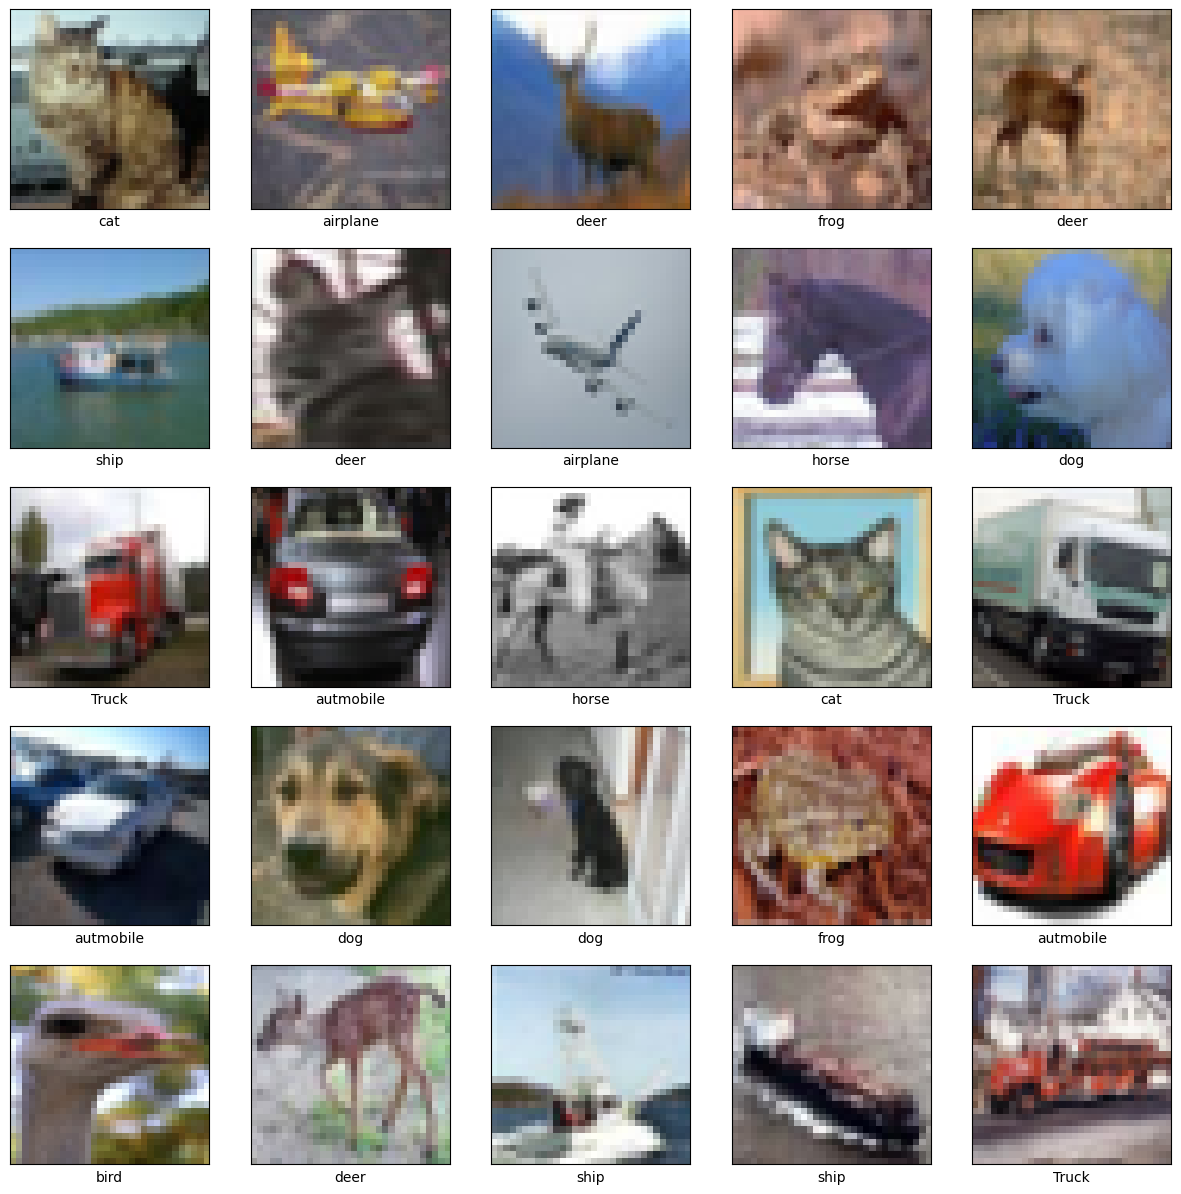

In [56]:
showRandomfigures(5,5,X_train, y_train, (15,15))

## BuiLding Convolutional Neural Network

In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Flatten, Activation, PReLU, Softmax, Conv2D,MaxPooling2D
from tensorflow.keras.regularizers import L2
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

%load_ext tensorboard

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import datetime

class CNN:
    def __init__(self, name, inputShape, filters, kernels, outputs, hiddenLayers, neurons, neuronsThreshold, outThreshold) -> None:
        self.name = name
        self.outputs = outputs
        self.inputShape = inputShape
        self.hiddenLayers = hiddenLayers
        self.neurons = neurons
        self.model = Sequential(name=self.name)
        
        # Add the first Conv2D layer
        self.model.add(Conv2D(filters=filters, kernel_size=kernels, activation=neuronsThreshold, input_shape=inputShape))
        
        # Adding Conv2D and MaxPooling layers
        try:
            for i in range(2):
                self.model.add(MaxPooling2D((2, 2)))
                self.model.add(Conv2D(neurons, kernels, activation=neuronsThreshold))
        except Exception as e:
            print(e)
        
        # Flatten the output before feeding into fully connected layers
        self.model.add(Flatten())
        
        # Adding dense hidden layers
        for i in range(hiddenLayers):
            self.model.add(Dense(neurons, activation=neuronsThreshold))
        
        # Output layer
        self.model.add(Dense(outputs, activation=outThreshold))
        
        # Summary of the model
        self.model.summary()

    # Method to add optimizer, loss, and metrics
    def addOptimizer(self, algOptimizer, jLoss, listMetrics):
        self.model.compile(optimizer=algOptimizer, loss=jLoss, metrics=listMetrics)
        
        self.logDir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        self.tensorboard_callback = TensorBoard(log_dir=self.logDir, histogram_freq=1)
        
        self.earlystopping_callback = EarlyStopping(
            monitor='val_loss',
            min_delta=0,
            patience=3,
            verbose=0,
            mode='auto',
            baseline=None,
            restore_best_weights=True
        )

    # Method to train the model
    def fit(self, Xtrain, yTrain, batchSize, iterations, validations=0.2):
        self.model.fit(
            x=Xtrain,
            y=yTrain,
            epochs=iterations,
            batch_size=batchSize,
            validation_split=validations,
            callbacks=[self.tensorboard_callback, self.earlystopping_callback]
        )

    # Method to evaluate the model
    def evaluate(self, Xtest, yTest):
        return self.model.evaluate(Xtest, yTest, verbose=2)

    # Method to save the model
    def save(self, name):
        save_dir = "/results/"
        name = f'{name}.h5'
        self.model.save(name)
        model_path = save_dir + name
        print('Saved trained model at %s ' % model_path)


In [59]:
model1 = CNN('CNN01',(32,32,3),32,(3,3),10,2,64,'relu','softmax')

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN01"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,730 (495.04 KB)

 Trainable params: 126,730 (495.04 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model1.addOptimizer( optimizers.Adamax(),
SparseCategoricalCrossentropy(from_logits=True),
listMetrics=['accuracy',])

In [64]:
# %tensorboard --logdir logs/fit

In [65]:
ytest = y_test.flatten()
model1.model.evaluate(X_test,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.1004 - loss: 2.3036


[2.303823947906494, 0.09889999777078629]

In [66]:
predictions = model1.model.predict(X_test)
predictions.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


(10000, 10)

In [67]:
import matplotlib.pyplot as plt
import numpy as np

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    # Plot the image
    plt.imshow(img, cmap=plt.cm.binary)
    
    # Get the predicted label
    predicted_label = np.argmax(predictions_array)
    
    # Set the color based on whether the prediction is correct
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    # Add a label below the image
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                100 * np.max(predictions_array),
                class_names[true_label]), color=color)


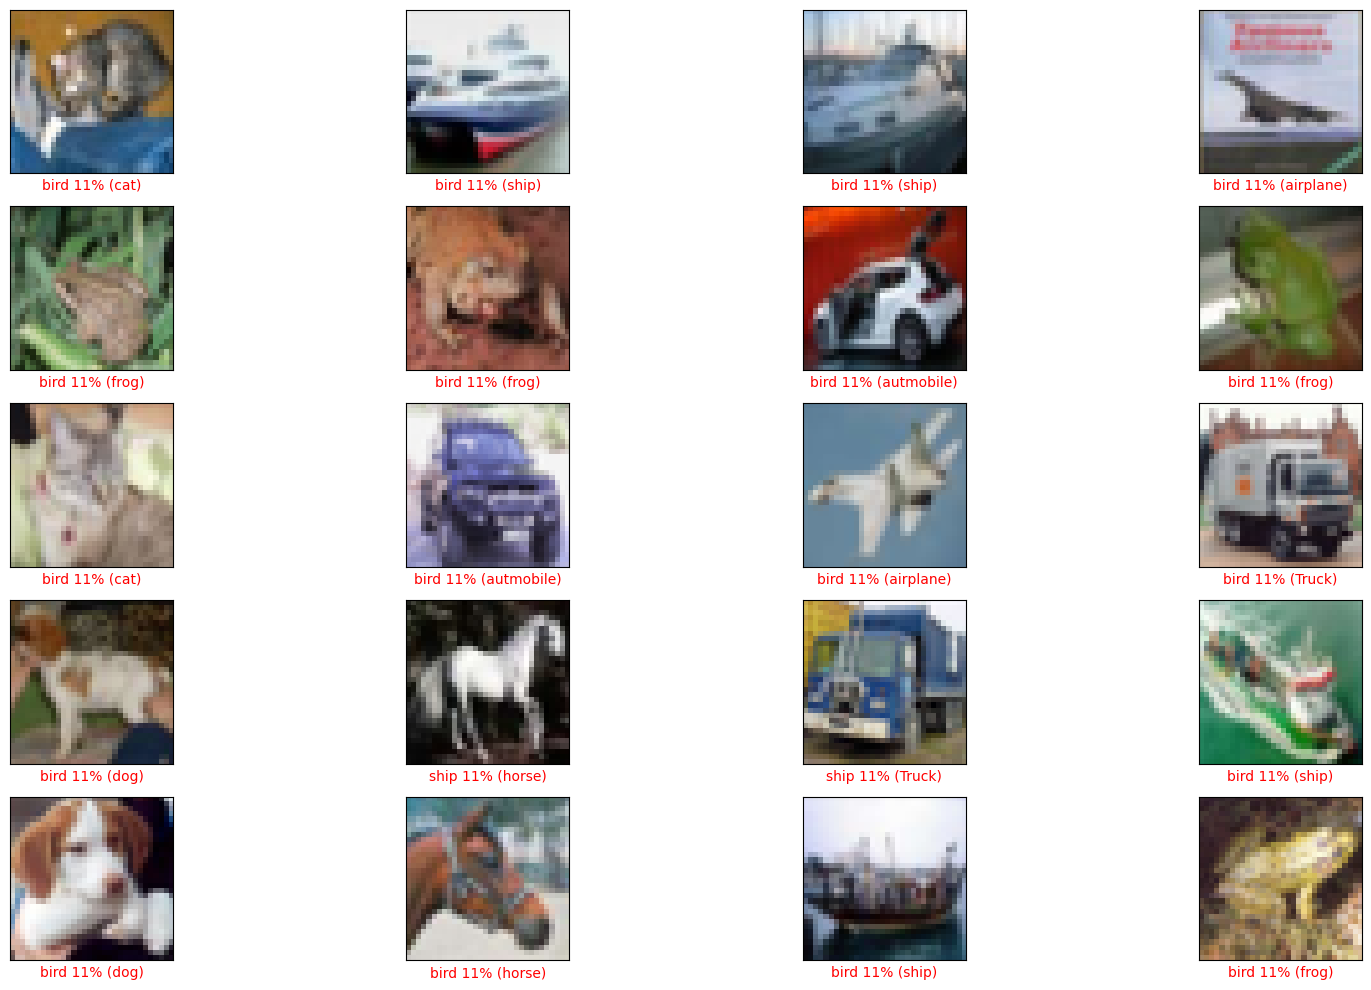

In [74]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], ytest, X_test)
plt.tight_layout()
plt.show()